## 做一个词云图

* 1.准备一张jpg或png的图片
* 2准备要text文档，需要对文档进行作图的


## 步骤1 导入包

In [1]:
#导入所需要的包
import wordcloud                     # 词云展示库
import jieba                         # 中文分词库
import re                            # 正则表达式库
import collections                   # 数据容器库
import numpy as np                   # 数据处理库
import matplotlib.pyplot as plt      # 图像展示库
from PIL import Image                # 图像处理库

## 步骤2 导入文本

In [2]:
#读取文本
with open('D:/NLP/组会/政府报告.txt',encoding='utf-8')as f:
    text = f.read()

 ## 步骤3 文本处理

In [3]:
# 定义正则表达式匹配模式，如果是英文的化就不要去掉空格了，英文去掉空格英文就没办法分词喽^^
pattern = re.compile(u'\s*|\t|\n|\.|-|:|;|\)|\(|\?|"'
                     u'|，|。|；|“|”|、|？|！|《|》|：|（|）') 
# 将符合模式的字符去除
string_data = re.sub(pattern, '', text) 

# 看看清洗了标点符号以后的结果
print('清洗了标点符号后的结果：')
print(string_data[0: 1000], '...')

清洗了标点符号后的结果：
习近平在中央政治局常委会会议研究应对新型冠状病毒肺炎疫情工作时的讲话原标题习近平在中央政治局常委会会议研究应对新型冠状病毒肺炎疫情工作时的讲话在中央政治局常委会会议研究应对新型冠状病毒肺炎疫情工作时的讲话2020年2月3日习近平武汉新型冠状病毒肺炎疫情发生后1月7日我主持召开中央政治局常委会会议时就对新型冠状病毒肺炎疫情防控工作提出了要求1月20日我专门就疫情防控工作作出批示指出必须高度重视疫情全力做好防控工作要求各级党委和政府及有关部门把人民群众生命安全和身体健康放在第一位采取切实有效措施坚决遏制疫情蔓延势头1月22日鉴于疫情迅速蔓延防控工作面临严峻挑战我明确要求湖北省对人员外流实施全面严格管控正月初一我再次主持召开中央政治局常委会会议对疫情防控特别是患者治疗工作进行再研究再部署再动员并决定成立中央应对疫情工作领导小组从年初一到现在疫情防控是我最关注的问题我时刻跟踪着疫情蔓延形势和防控工作进展情况不断作出口头指示和批示党中央印发了关于加强党的领导为打赢疫情防控阻击战提供坚强政治保证的通知中央应对疫情工作领导小组多次开会研究部署疫情防控工作前方指导组也积极开展工作国务院联防联控机制加强协调调度及时协调解决防控工作中遇到的紧迫问题有关部门各司其职军队积极支援地方疫情防控各地区成立了党政主要负责同志挂帅的领导小组启动了重大突发公共卫生事件I级响应各党政军群机关和企事业单位紧急行动全力奋战广大医务人员无私奉献英勇奋战广大人民群众众志成城团结奋战打响了疫情防控的人民战争打响了疫情防控的总体战全国形成了全面动员全面部署全面加强疫情防控工作的局面在党中央集中统一领导下在各方面共同努力下防控工作正有力开展社会各界和国际舆论反映总体是好的我在会见世界卫生组织总干事谭德塞时谭德塞表示中方行动速度之快规模之大世所罕见这是中国的制度优势有关经验值得其他国家借鉴相信中国采取的措施将有效控制并最终战胜疫情2020年2月10日中共中央总书记国家主席中央军委主席习近平在北京调研指导新冠肺炎疫情防控工作这是习近平在朝阳区疾病预防控制中心调研刘彬摄总的看党中央对疫情形势的判断是准确的各项工作部署是及时的采取的举措也是有效的现在最关键的问题就是把工作抓实抓细抓落地下面我强调几点做好疫情防控工作直接关系人民生命安全和身体健康直接关系经济社会大局稳定也事关我国对外开放我们要按照坚

## 步骤4 分词

In [4]:
# 下面，我们对去掉标点符号后的文本进行分词
# cut_all=False 是精确模式分词，否则像'共和国'这样的词会被分成'共和国'，'共和' 和 '国'
seg_list_exact = jieba.cut(string_data, cut_all = False) 
all_words = list(seg_list_exact)

print('看看分词的结果：')
print(all_words[0:100])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Geoffrey\AppData\Local\Temp\jieba.cache
Loading model cost 0.829 seconds.
Prefix dict has been built succesfully.


看看分词的结果：
['习近平', '在', '中央政治局常委会', '会议', '研究', '应对', '新型', '冠状病毒', '肺炎', '疫情', '工作', '时', '的', '讲话', '原', '标题', '习近平', '在', '中央政治局常委会', '会议', '研究', '应对', '新型', '冠状病毒', '肺炎', '疫情', '工作', '时', '的', '讲话', '在', '中央政治局常委会', '会议', '研究', '应对', '新型', '冠状病毒', '肺炎', '疫情', '工作', '时', '的', '讲话', '2020', '年', '2', '月', '3', '日', '习近平', '武汉', '新型', '冠状病毒', '肺炎', '疫情', '发生', '后', '1', '月', '7', '日', '我', '主持', '召开', '中央政治局常委会', '会议', '时', '就', '对', '新型', '冠状病毒', '肺炎', '疫情', '防控', '工作', '提出', '了', '要求', '1', '月', '20', '日', '我', '专门', '就', '疫情', '防控', '工作', '作出', '批示', '指出', '必须', '高度重视', '疫情', '全力', '做好', '防控', '工作', '要求', '各级党委']


## 步骤5 去除停用词

In [5]:
# 自定义去除词库
remove_words = [u'的', u'，', u'和', u'是', u'中', u'在', u'了', u'各', u'有',
                u'对', u'等', u'能', u'都', u'。', u'要', u'、', u'我',
                u'对于', u'随着', u'通常', u'如果', u'我们', u'需要', u' ', '不','他'] 

clean_word_list = []
# 循环读出每个分词
for word in all_words:        
    # 如果不在去除词库中
    if word not in remove_words:  
        # 分词追加到最终列表
        clean_word_list.append(word)

# 对分词做词频统计，数一数每个不同的词都出现了多少次，一行代码搞定
word_counts = collections.Counter(clean_word_list) 
#print(word_counts)

# 看看统计的结果如何
print('看看去除无用词以后的结果：')
# 获取前10最高频的词
#word_counts_top20 = word_counts.most_common(20) 
word_counts_top10=word_counts.most_common(10)
# 输出检查
#print(word_counts_top20)
print(word_counts_top10)

看看去除无用词以后的结果：
[('疫情', 81), ('防控', 54), ('工作', 50), ('加强', 23), ('做好', 21), ('问题', 16), ('地区', 14), ('习近平', 11), ('方面', 11), ('稳定', 11)]


## 步骤6 做词云图

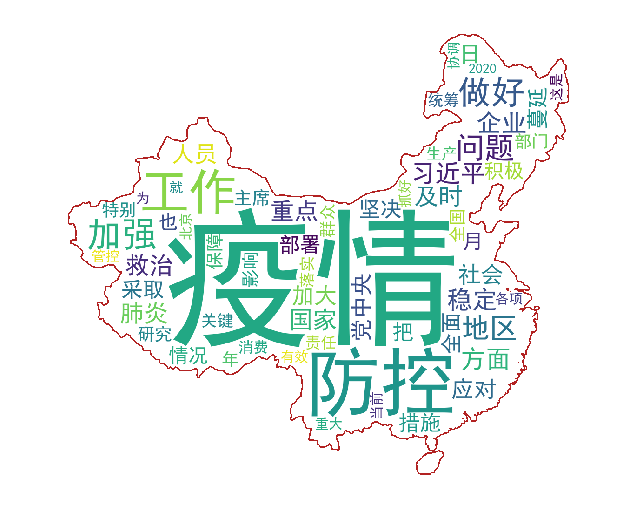

In [11]:
#wc_mask = np.array(Image.open('D:/NLP/组会/image.jpg'))
wc_mask = np.array(Image.open('D:/NLP/组会/china_map.png'))


wc = wordcloud.WordCloud(
    # 设置字体格式
    #font_path='/data/course_data/神奇词云/design/buzz_cloud_font.ttf', 
    font_path = r'C:\Windows\Fonts\simhei.TTF', #黑体
    #font_path = r'C:\Windows\Fonts\simkai.TTF', #楷体
   
    # 设置背景图
    # 设置背景图
    mask=wc_mask, 
    # 最多显示词数
    max_words=60,
    # 字体最大值
    max_font_size=320,
    # 整体背景色
    background_color='White',
    # 词云的边框大小
    contour_width=2,
    # 词云的边框颜色
    contour_color='Firebrick'
)

# 从字典生成词云
wc.generate_from_frequencies(word_counts) 
# 从背景图建立颜色方案
image_colors = wordcloud.ImageColorGenerator(wc_mask)
# 显示词云
plt.figure(figsize=[10, 10])
plt.imshow(wc)                                       
plt.axis('off')    #off关闭画框                                   
plt.show() 